<a href="https://colab.research.google.com/github/copev313/Predicting-Customer-Churn-With-Logistic-Regression/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Customer Churn Rate Using Python & Machine Learning**

## Introduction

This demonstration will be predicting customer churn rate given various properties provided by the customer's account.

Let's start by importing the libraries and data we will be using.

In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn --quiet

In [59]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [60]:
# Load our data into a DataFrame
df = pd.read_csv('churn.csv')

# See a preview:
print(df.head(10))

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes
5  9305-CDSKC  Female              0  ...          99.65        820.5    Yes
6  1452-KIOVK    Male              0  ...          89.10       1949.4     No
7  6713-OKOMC  Female              0  ...          29.75        301.9     No
8  7892-POOKP  Female              0  ...         104.80      3046.05    Yes
9  6388-TABGU    Male              0  ...          56.15      3487.95     No

[10 rows x 21 columns]


## Getting to Know Our Data

In [61]:
# Look at the dimensions of our DataFrame
print('Shape:\n', df.shape, '\n')

# List all the column titles in our table:
print('Columns:\n', df.columns.values, '\n')

# Check columns for missing values:
print('Missing Values:\n', df.isna().sum(), '\n')


Shape:
 (7043, 21) 

Columns:
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn'] 

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64 



In [62]:
# Summary Statistics:
print(df.describe(), '/n')

# Get customer churn count:
print('\n--Churn Value Counts--\n', df['Churn'].value_counts())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000 /n

--Churn Value Counts--
 No     5174
Yes    1869
Name: Churn, dtype: int64


## Visualizing Customer Churn

### Churn Total Count

73.463 % of customers stayed.
26.537 % of customers left.


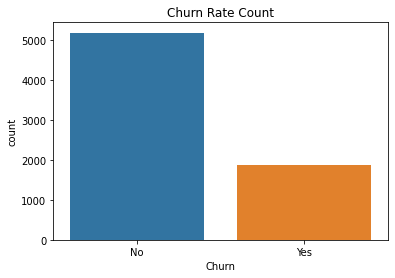

In [73]:
# Create a bar graph of our count:
sns.countplot(data=df, x='Churn').set(title="Churn Rate Count")

# Define yes/no conditions:
NO = df['Churn'] == 'No'
YES = df['Churn'] == 'Yes'

num_retained = df[NO].shape[0]
num_churned = df[YES].shape[0]

# Percentage of customer that have stayed vs. those who've left:
retain_rate = num_retained/(num_churned + num_retained) * 100
churn_rate = num_churned/(num_churned + num_retained) * 100

print(round(retain_rate, 3), "% of customers stayed.")
print(round(churn_rate, 3), "% of customers left.")

### Churn by Gender

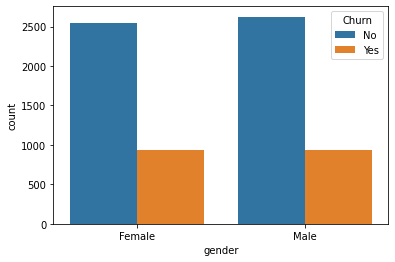

In [64]:
# Create bar graph based on gender:
sns.countplot(data=df, x='gender', hue='Churn')

### Churn by Internet Service

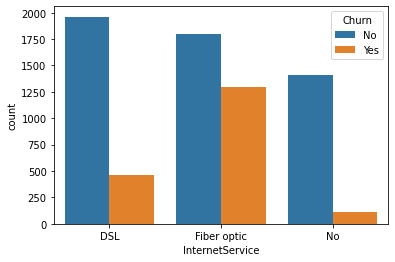

In [65]:
# Create bar graph based on customer's internet service:
sns.countplot(data=df, x='InternetService', hue='Churn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb7b490610>,
      dtype=object)

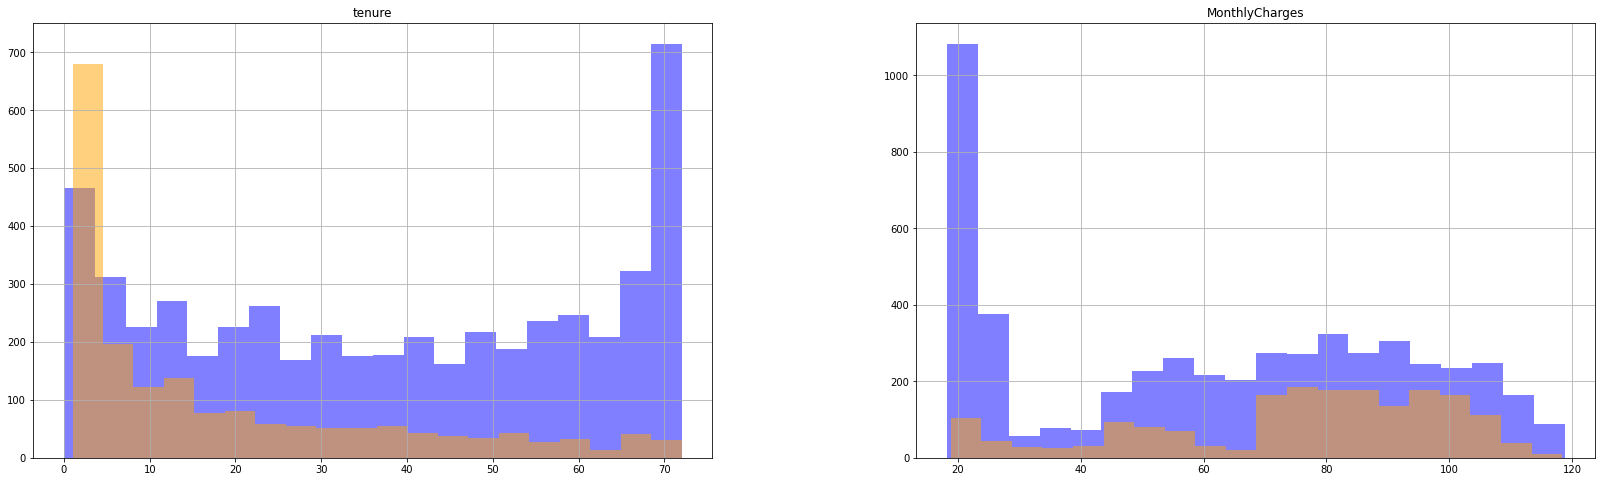

In [66]:
numeric_features = ['tenure', 'MonthlyCharges']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))

df[NO][numeric_features].hist(
    bins=20, color='blue', alpha=0.5, ax=ax
)

df[YES][numeric_features].hist(
    bins=20, color='orange', alpha=0.5, ax=ax
)


## Clean Our Data

In [67]:
# Drop the id column:
clean_df = df.drop('customerID', axis=1)

# Convert non-numerical values to numerical:
for col in clean_df.columns:
  if (clean_df[col].dtype == np.number):
    continue
  clean_df[col] = LabelEncoder().fit_transform(clean_df[col])

# See the data types of our columns:
print(clean_df.dtypes)


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [68]:
# Preview our new DataFrame:
print(clean_df.head(10))

   gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85          2505      0
1       1              0        0  ...           56.95          1466      0
2       1              0        0  ...           53.85           157      1
3       1              0        0  ...           42.30          1400      0
4       0              0        0  ...           70.70           925      1
5       0              0        0  ...           99.65          6104      1
6       1              0        0  ...           89.10          1550      0
7       0              0        0  ...           29.75          2609      0
8       0              0        1  ...          104.80          2646      1
9       1              0        0  ...           56.15          3022      0

[10 rows x 20 columns]


## Scale & Split the Data Set

In [69]:
# Scale the data set:
x = clean_df.drop('Churn', axis=1)
y = clean_df['Churn']
x = StandardScaler().fit_transform(x)

# Split the data 80 training/20 testing:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)


## Build & Train Our Model

In [70]:
# Use the logisitic regression algorithm:
model = LogisticRegression()

# Train our model / fit our data:
model.fit(xtrain, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Make Our Predictions & Calculate the Accuracy

In [71]:
# Create predictions from the test data:
predictions = model.predict(xtest)

# See preview of predictions:
print(predictions)


[0 1 1 ... 0 0 1]


In [72]:
# Create a report of the accuracy of our classifications:
report = classification_report(ytest, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1021
           1       0.71      0.56      0.62       388

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

